<a href="https://colab.research.google.com/github/SidharrthSingh25/ML/blob/master/ASSIGNMENT_6/SVM_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. DATA PREPROCESSING

1.1 IMPORTING LIBRARIES

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

1.2 IMPORTING DATASETS

In [ ]:
dataset = pd.read_csv ('pulsar_stars.csv')
X = dataset.iloc [ : , :-1].values
Y = dataset.iloc [ : ,-1].values

1.3 SPLITTING INTO TRAINING AND TEST SET

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split (X, Y, test_size = 0.25, random_state = 0)

1.4 FEATURE SCALING

In [ ]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler ()
X_train = sc_X.fit_transform (X_train)
X_test = sc_X.transform (X_test)

## 2. SVM MODEL

2.1 TRAINING SVM MODEL ON TRAINING SET

In [ ]:
from sklearn.svm import SVC
classifier = SVC (kernel = 'linear', random_state = 0)
classifier.fit (X_train,Y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

2.2 PREDICTING NEW RESULT

In [ ]:
print (classifier.predict (sc_X.transform ([[140.5625,55.68378214,-0.234571412,-0.699648398,3.199832776,19.11042633,7.975531794,74.24222492,]])))

[0]


2.3 PREDICTING TEST SET RESULTS

In [ ]:
Y_pred = classifier.predict (X_test)
print (np.concatenate ((Y_pred.reshape (len (Y_pred),1), Y_test.reshape (len (Y_test),1)),1))

[[0 0]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


2.4 MODEL ACCURACY

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix (Y_test, Y_pred)
print (cm)
acc = accuracy_score (Y_test, Y_pred)
print ('MODEL ACCURACY is - ' + str (acc*100) + '%')

[[4095   64]
 [  20  296]]
MODEL ACCURACY is - 98.12290502793296%


## 3. VISUALISING TEST SET RESULTS

In [ ]:
X_test = sc_X.inverse_transform (X_test)

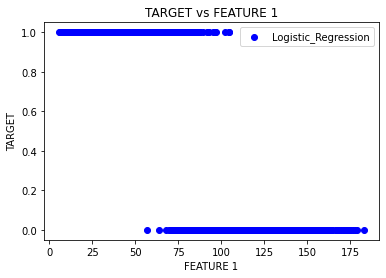

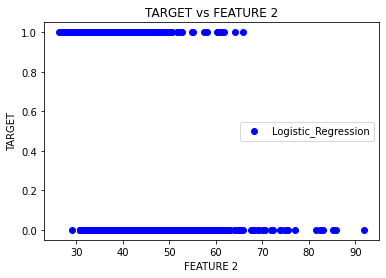

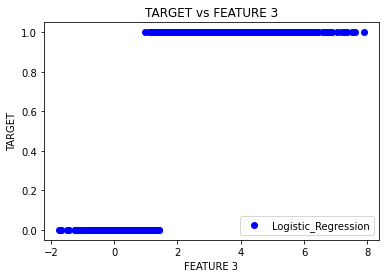

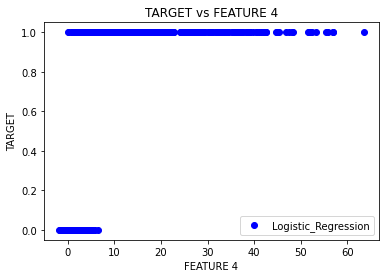

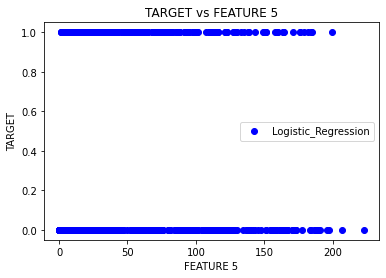

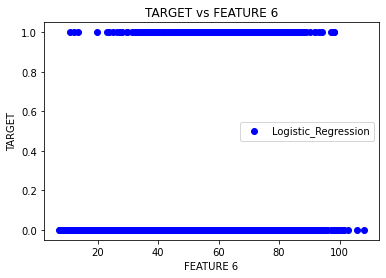

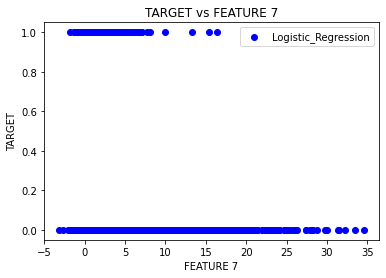

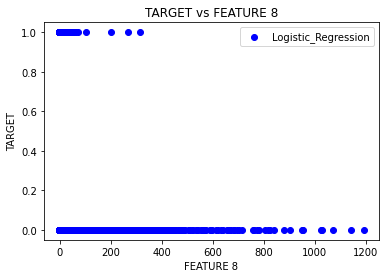

In [ ]:
for i in range (8):
  plt.figure ()
  plt.scatter (X_test [ : ,i], Y_pred, color = 'blue', label = 'Logistic_Regression')
  plt.title ('TARGET vs FEATURE ' + str (i+1))
  plt.xlabel ('FEATURE ' + str (i+1))
  plt.ylabel ('TARGET')
  plt.legend ()
  plt.show ()